# Телеком — Определение неэффективных операторов

### Задача**:**

Помогите «Нупозвони» найти самых неэффективных операторов. Признаки низкой эффективности:

- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.

1. **Проведите исследовательский анализ данных.**
2. **Определите неэффективных операторов.**
3. **Проверьте статистические гипотезы.**

### **Описание данных:**

Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальный телефонии. Его клиенты — колл-центры, которые: 

- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

Колонки в `telecom_dataset.csv.zip`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)

Колонки в `telecom_clients.csv`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентв в сервисе

Примечание: Прочитать датасет **telecom_dataset.csv.zip** можно не распаковывая, используя команду `pd.read_csv('telecom_dataset.csv.zip')`
****
По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

### **Датасеты**:

[telecom_clients.csv](https://disk.yandex.ru/d/qDyw04TLVP4CiA)

[telecom_dataset.csv](https://disk.yandex.ru/d/Z6Q6KHy2I_WwCA)

### **Презентация**

[Критерии неэффективных операторов](https://disk.yandex.ru/i/e2_46VOszeQ4gQ)

### Дашборды

Чтобы отправить дашборд, приложите к проекту ссылку на файл. Выберите один из наборов:

Набор №1

1. Постройте гистограмму распределения длительности звонков;
2. Постройте круговую диаграмму, отображающую соотношение кол-ва внутренних и внешних вызовов;
3. Добавьте фильтр дашборда по направлению вызовов.

Набор №2

1. Постройте диаграмму количества вызовов по дням;
2. Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов;
3. Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

**Данное исследование разделим на несколько частей.**<a name="start"></a> 

***Часть 1. Загрузите данные и изучите общую информацию:***
* [1. Загрузите данные [`telecom_clients.csv`], [`telecom_dataset.csv`].](#dataset)
* [2. Изучите общую информацию о датасете. Сколько call центров представлено? Сколько операторов? Что можно сказать о каждом столбце? Значения какого типа они хранят?](#info)

***Часть 2. Выполните предобработку данных***
* [1. Изучите, есть ли дубликаты в данных. Можно ли их обработать или оставить как есть? Проверьте пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?.](#dubl)
* [2. Приведите данные к нужному типу в соответствующих столбцах (`date`: datetime)](#date)
* [3. Проверьте данные на выбросы по количисеству звонков и продолжительности. Используйте `ящик с усами`.](#emissions)
* [4. Объедините таблицы методом `merge`. Присоедините `telecom_clients` к `telecom_dataset` так, чтобы у каждого оператора быт показан тариф (`tariff_plan`)](#merge)

***Часть 3. Анализ данных***
* [1. Для call центров работаюх на разных тарифах проанализировать отличия на каждом тарифе.](#analysis_in_centr)
     * 1.1. Сделать группировку по call центрам и по тарифам. Вывести информацию сколько входящих и исходящих звонков в среднем в день call центрах на каждом тарифе. 
     * 1.2. Сколько пропущенных звонков. Какая средняя продолжительность. Какой процент от общего количества звонков составляют пропущенные. 
     * 1.3. Какое общее время звонков и ожидания (с учетом внутренних звонков). Определите в каких единицах указана продолжительность звонков и ожидания. Сколько звонков в день в может делать оператор? Какая их средняя продолжительность.
     * 1.4. Определить основные отличия для каждого тарифах. Определить какие тарифы больше предназначены на исходящие звонки, а какие на входящие.
* [2. Для call центров работаюх на разных тарифных планах сформулировать метрики для оценки качества работы операторов.](#analysis_in_operator)
     * 2.1. Проанализуйте работу операторов работающих в КЦ с тарифными планами для исходящих звонков. Определите среднее количество звонков в день, среднюю продолжительность. Исходя из общей прдолжительности звонков предположите единицы измерения. Из всей полученной информации сформулируйти критерии неэффективной работы оператора для таких КЦ. В Критериях должны быть отражены следующие данные: минимальная длительность звонков в день, минимальное количество звонков в день.
     * 2.2. Проанализируйте работу операторов работающих в КЦ с тарифными планами для входящих звонков. Определите среднюю продолжительность звонков в день, количество звонков в день, количество пропущенных звонков в день и их процент от общего количества звонков.Среднее время ожидания для недозвонов. Сформулируйте критерии для неэффективной работы операторов для таких КЦ. В критериях должны быть отражены сдедующие данные: продолжительность звонков в день, количечество пропущенных звонков (при хорошо отлаженной работе в КЦ допускается до 5% пропущенных звонков из общего числа звонков)
     
         

***Часть 4. Статистический анализ***     
* [1. На основе полученных данных формулируем две нулевые гипотезы.](#analysis_stat)
     * 1.1. Call центры работающие тарифном плане А совершают больше контактов с клиентами, чем центры которые работают на Тарифных планах В и С. 
     * 1.2. Длительность разговоров в Call центрах работающих тарифном плане А больше, чем центрах которые работают на т планах В и С.
     * 1.3. Определяем значение уровня значимаости (`alpha`).
     * 1.4. Проверяем нулевые гипотезы. Выводим результаты проверки.    
     

    
      
***Часть 5. Выводы. Рекомендации для заказчика***     
* [1. На основе проведенного аналаза формулируем выводы.](#conclusion)
     * 1.1. Критерии неэффективности операторов
     * 1.2. Дополнительные выводы и рекомендации

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# !pip install -U seaborn
import seaborn as sns

# !pip install plotly==5.3.1
# !conda install plotly==5.3.1
import plotly
import plotly.express as px

from datetime import date

%matplotlib inline

from plotly import graph_objects as go
from scipy import stats as st


***Часть 1. Загрузите данные и изучите общую информацию:***
* 1. Загрузите данные [`telecom_clients.csv`], [`telecom_dataset.csv`]<a name="dataset"></a>

In [2]:
try:
    telecom_clients, telecom_dataset = (
    pd.read_csv('telecom_clients.csv'),  
    pd.read_csv('telecom_dataset.csv')
) 
except:
    telecom_clients, telecom_dataset = (
    pd.read_csv('/datasets/telecom_clients.csv'),
    pd.read_csv('/datasets/telecom_dataset.csv')
)

* 2. Изучите общую информацию о датасете. Сколько call центров представлено? Сколько операторов? Что можно сказать о каждом столбце? Значения какого типа они хранят?<a name="info"></a>


**telecom_clients**

telecom_clients = pd.read_csv('telecom_clients.csv')

In [3]:
print(f'Имеем таблицу данных  telecom_clients размерностью {telecom_clients.shape}')

Имеем таблицу данных  telecom_clients размерностью (732, 3)


In [4]:
telecom_clients.head(5) 

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
print(f'Дата первой регистрации {telecom_clients.date_start.min()}')

Дата первой регистрации 2019-08-01


In [6]:
print(f'Дата последней регистрации {telecom_clients.date_start.max()}')

Дата последней регистрации 2019-10-31


In [7]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Посмотрим какие тарифы у нас есть

In [8]:
telecom_clients.tariff_plan.unique()

array(['A', 'C', 'B'], dtype=object)

Существует всего три тарифа: 'A', 'C', 'B'

In [9]:
print(f'Количество CALL центров в telecom_clients: {telecom_clients.user_id.nunique()}')

Количество CALL центров в telecom_clients: 732


**telecom_dataset**

In [10]:
print(f'Имеем таблицу данных  telecom_dataset размерностью {telecom_dataset.shape}')

Имеем таблицу данных  telecom_dataset размерностью (53902, 9)


Выведем первые пять строк

In [11]:
telecom_dataset.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Выведем общую информацию о датафрейме методом info()

In [12]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


В date будет необходимо изменить формат на datetime для дальнейшего анализа. 

In [13]:
print(f'Количество CALL центров: {telecom_dataset.user_id.nunique()}')

Количество CALL центров: 307


In [14]:
print(f'Количество операторов: {telecom_dataset.operator_id.nunique()}')

Количество операторов: 1092


In [15]:
print(f'Дата первого наблюдения {telecom_dataset.date.min()}')

Дата первого наблюдения 2019-08-02 00:00:00+03:00


In [16]:
print(f'Дата последнего наблюдения {telecom_dataset.date.max()}')

Дата последнего наблюдения 2019-11-28 00:00:00+03:00


***Вывод***

У нас две таблицы с данными. 

В первой `telecom_clients` информацию о тарифах, на которых работают операторы. Всего имеем три тарифа:А, В и С. В этой же таблице хранится информация по дате регистрации. Первая регистрация 01.08.2019, последняя 31.10.2022 года

Во второй таблице `telecom_dataset` 53902 строки, 9 столбцов.

Всего имеем информацию по 1092 операторам в 307 Call центрах.

    Дата первого наблюдения 2019-08-02
    Дата последнего наблюдения 2019-11-28
    
В столбце `date` необходими изменить тип и формат.

[Вернуться в начало](#start)

***Часть 2. Выполните предобработку данных***
* 1. Изучите, есть ли дубликаты в данных. Можно ли их обработать или оставить как есть? Проверьте пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?.<a name="dubl"></a>


In [17]:
print(f'Количество дубликатов в telecom_clients: {telecom_clients.duplicated().sum()}')

Количество дубликатов в telecom_clients: 0


Посмотрим количество пропуков в telecom_clients

In [18]:
telecom_clients.isna().sum()  

user_id        0
tariff_plan    0
date_start     0
dtype: int64

Пропусков в telecom_clients нет

Посмотрим количество пропуков в telecom_dataset методом isna() 

In [19]:
telecom_dataset.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Имеем 117 пропусков в internal и 8172 пропуска в operator_id 

Посмотрим долю пропущенных значений в каждом столбце:

In [20]:
telecom_dataset.isna().mean()

user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.002171
operator_id            0.151608
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64

Обработаем пропуски:

в operator_id более 15% пропусков, заменим их на -1 (маркерное число)

в internal 0,2%, это не критичные данные, эти пропуски заменим на 0

In [21]:
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].fillna(-1)  

In [22]:
telecom_dataset['internal'] = telecom_dataset['internal'].fillna(0)

In [23]:
telecom_dataset.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [24]:
telecom_dataset.shape

(53902, 9)

In [25]:
print(f'Количество дубликатов в telecom_dataset: {telecom_dataset.duplicated().sum()}')

Количество дубликатов в telecom_dataset: 4900


Посмотрим, какие это данные

In [26]:
Dup_Rows = telecom_dataset[telecom_dataset.duplicated()]

print("Строки с повторяющимися значениями : \n") 
Dup_Rows

Строки с повторяющимися значениями : 



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,-1.0,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,-1.0,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,-1.0,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


Судя по всему, идет просто дублирование информации. Удалим эти дубликаты

In [27]:
telecom_dataset = telecom_dataset.drop_duplicates()

In [28]:
telecom_dataset.duplicated().sum()   

0

In [29]:
telecom_dataset.shape

(49002, 9)

In [30]:
telecom_dataset.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000
mean,167294.892759,777067.674911,16.462777,866.282091,1156.558202
std,598.558965,329774.097101,63.604098,3775.503352,4451.473661
min,166377.000000,-1.000000,1.000000,0.000000,0.000000
25%,166782.000000,890416.000000,1.000000,0.000000,46.000000
50%,167158.000000,906406.000000,4.000000,37.000000,208.000000
75%,167819.000000,929884.000000,12.000000,570.000000,901.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


* 2. Приведите данные к нужному типу в соответствующих столбцах (`date`: datetime)<a name="date"></a>


In [31]:
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date']).dt.date
telecom_dataset.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,-1.0,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5


* 3. Проверьте данные на выбросы по количеству звонков и продолжительности. Используйте `ящик с усами`.<a name="emissions"></a>


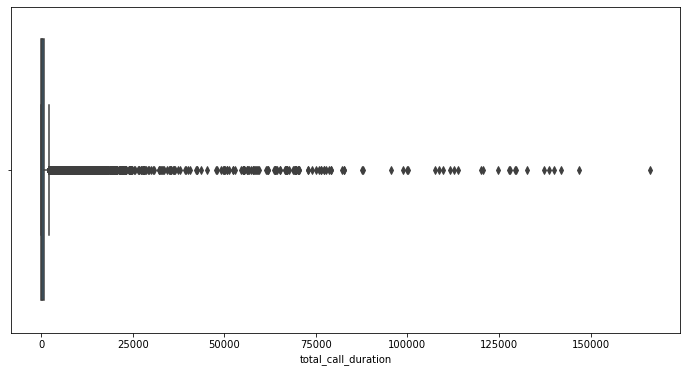

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="total_call_duration", data=telecom_dataset)

Очень похоже, что время звонков измеряли в минутах, посмотрим картину если сделать срез на 1440 минут (1 сутки)

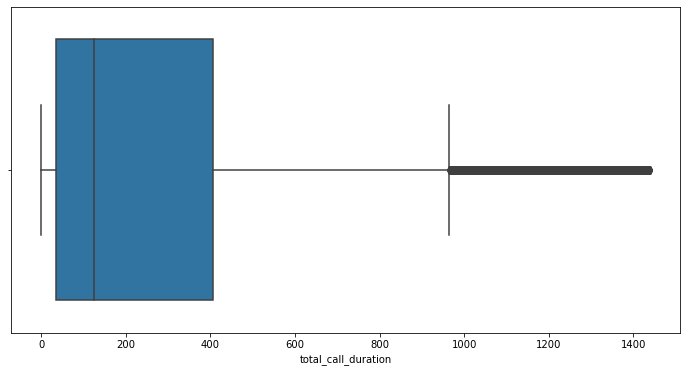

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="total_call_duration", data=telecom_dataset[telecom_dataset['total_call_duration']<1440])

Действительно, продолжительность звонков указана в минутах. Тогда все данные, где количество минут более 1440 минут можно считать аномальными и необходимо их удалить.

In [34]:
telecom_dataset = telecom_dataset[telecom_dataset['total_call_duration'] <= 1440]

Изучим количество звонков

In [35]:
telecom_dataset.groupby('operator_id')['calls_count'].mean().sort_values(ascending=False)

operator_id
920416.0    65.142857
945294.0    56.928571
921594.0    52.000000
919378.0    51.000000
945322.0    49.722222
              ...    
914626.0     1.000000
954284.0     1.000000
954318.0     1.000000
954376.0     1.000000
937772.0     1.000000
Name: calls_count, Length: 1090, dtype: float64

На первый взгляд средние показатели нормальные.

Посмотрим на графике разброса:

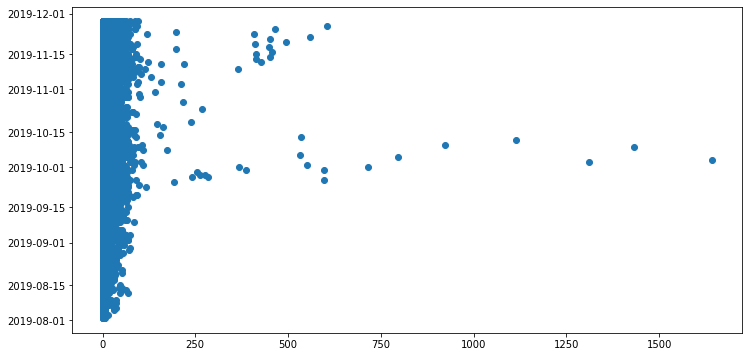

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(telecom_dataset.calls_count, telecom_dataset.date)
plt.show()

Можно сделать вывод, что значения более 200 звонков в день - это выбросы.

Удалим из данных эти значения

In [37]:
telecom_dataset = telecom_dataset[telecom_dataset['calls_count'] < 200]

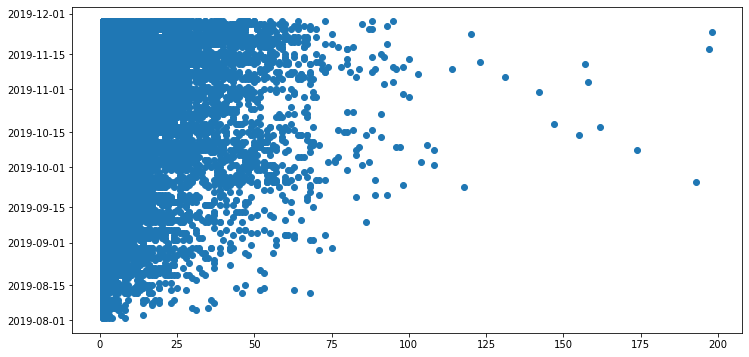

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(telecom_dataset.calls_count, telecom_dataset.date)
plt.show()

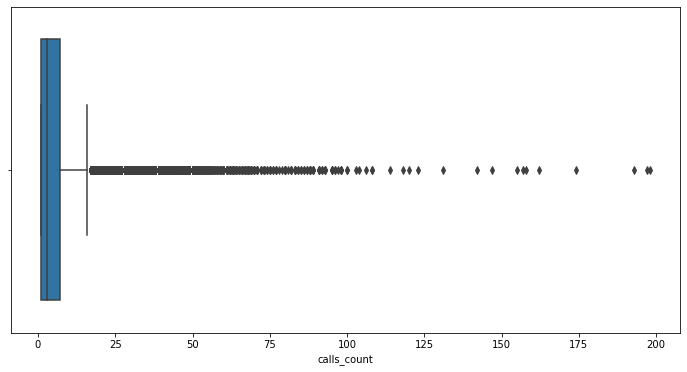

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="calls_count", data=telecom_dataset)

* 4. Объедините таблицы методом `merge`. Присоедините `telecom_clients` к `telecom_dataset` так, чтобы у каждого оператора быт показан тариф (`tariff_plan`)<a name="merge"></a>

In [40]:
telecom_dataset_clients = pd.merge(telecom_dataset, telecom_clients, on='user_id', how='left')

In [41]:
telecom_dataset_clients.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,-1.0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01


***Вывод***

В telecom_dataset выявили 117 пропусков в internal и 8172 пропуска в operator_id

    В operator_id пропуски заменили  на "не определено"
    Пропуски в internal заменили на 0, так как их не много и они не критичны.
После проверки на дубликаты были выявлены и в telecom_dataset 4900 полных дубликата.

Изменили формат даты для удобства отображения и обработки.

Провели первичный анализ и определили еденицы измерения длительности звонков и ожиданая - это минуты. 

Выявили выбросы по длительности звонков в день и сделали срез до 1440 мин (1 сутки)

Выявили выбросы по количеству звонков в день и сделали срез до 200 звонков.

Объединили обе таблицы. Теперь есть возможность анализировать данные в разрезе различных тарифных планов.

[Вернуться в начало](#start)

***Часть 3. Анализ данных***
* 1. Для call центров работающих на разных тарифах проанализировать отличия на каждом тарифе.<a name="analysis_in_centr"></a>
     * 1.1. Сделать группировку по call центрам и по тарифам. Вывести информацию сколько входящих и исходящих звонков в среднем в день call центрах на каждом тарифе. 
     * 1.2. Сколько пропущенных звонков. Какая средняя продолжительность. Какой процент от общего количества звонков составляют пропущенные. 
     * 1.3. Какое общее время звонков и ожидания (с учетом внутренних звонков). Определите в каких единицах указана продолжительность звонков и ожидания. Сколько звонков в день в может делать оператор? Какая их средняя продолжительность.
     * 1.4. Определить основные отличия для каждого тарифах. Определить какие тарифы больше предназначены на исходящие звонки, а какие на входящие.      

In [82]:
# Функция построения круговой диаграммы с группировкой по двум столбцам.
def pie_chart(df, column_1, column_2, column_3, title):
    data = df.groupby([column_1, column_2])[column_3].mean().reset_index()
    data.rename(columns={column_3: 'count'}, inplace=True)
    fig = px.sunburst(data,
                  path=[column_1, column_2],
                  values='count')
    fig.update_layout(title=title,
                  width=800,
                  height=600)
    fig.show()

Посмотрим среднее количество входящих и исходящих звонков на разных тарифах

In [ ]:
title = 'Среднее количество входящих и исходящих звонков на разных тарифах'
pie_chart(telecom_dataset_clients, 'tariff_plan', 'direction', 'calls_count', title)

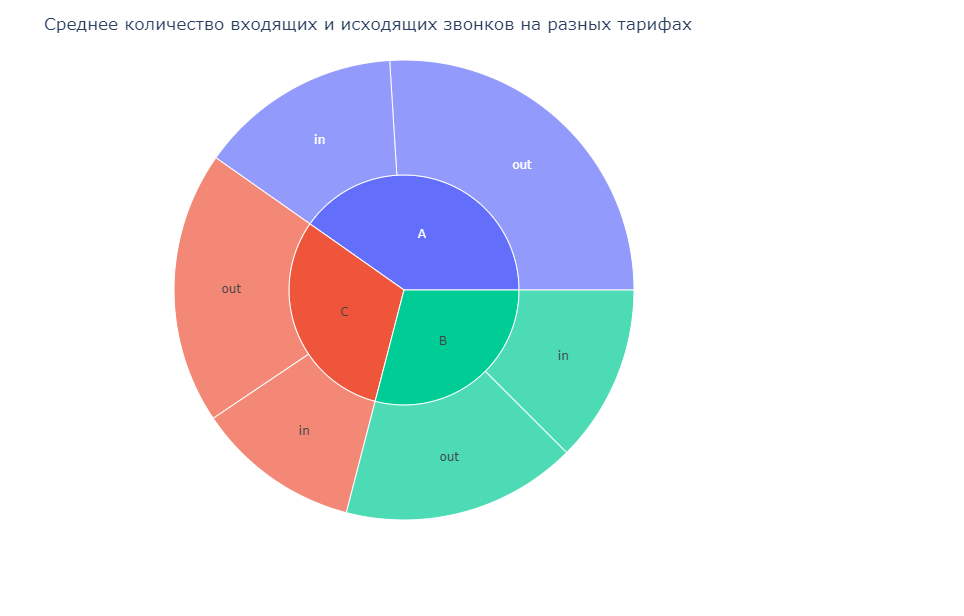

На каждом тарифе картина соотношения входящих и исходящих звонков приблизтельно одинаковая. Преобладают исходящие звонки.

Посмотрим на среднюю длительность звонков в зависимости от тарифа

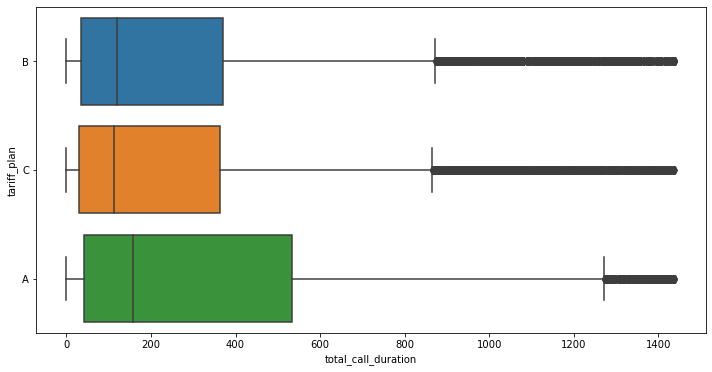

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="total_call_duration", y="tariff_plan", data=telecom_dataset_clients)

Самая большая средняя длительность звонков на тарифе "А". На "В" и "С" картина практически одинаковая. Скорее всего, именно этот тариф предусматривает длительные звонки.

Посмотрим среднее количество звонков на каждом тарифе

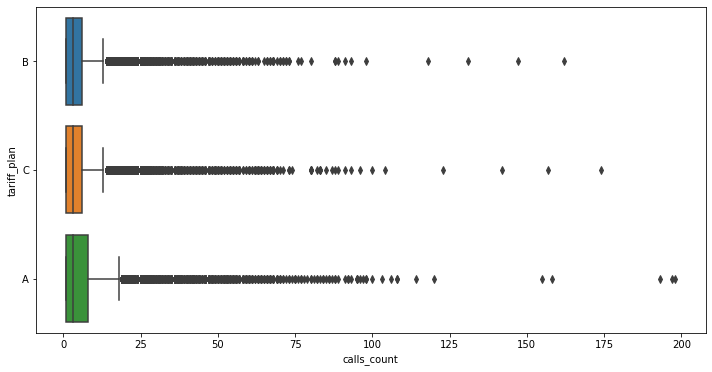

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="calls_count", y="tariff_plan", data=telecom_dataset_clients)

И по количеству звонков в день явно лидирует тариф А

In [ ]:
fig = go.Figure(data=[go.Pie(labels=telecom_dataset_clients['tariff_plan'],
                             values=telecom_dataset_clients['calls_count']
                             )
                     ]
               )
fig.update_layout(title='Общее количество звонков на тарифах',
                  width=800,
                  height=600)
fig.show() # выводим график

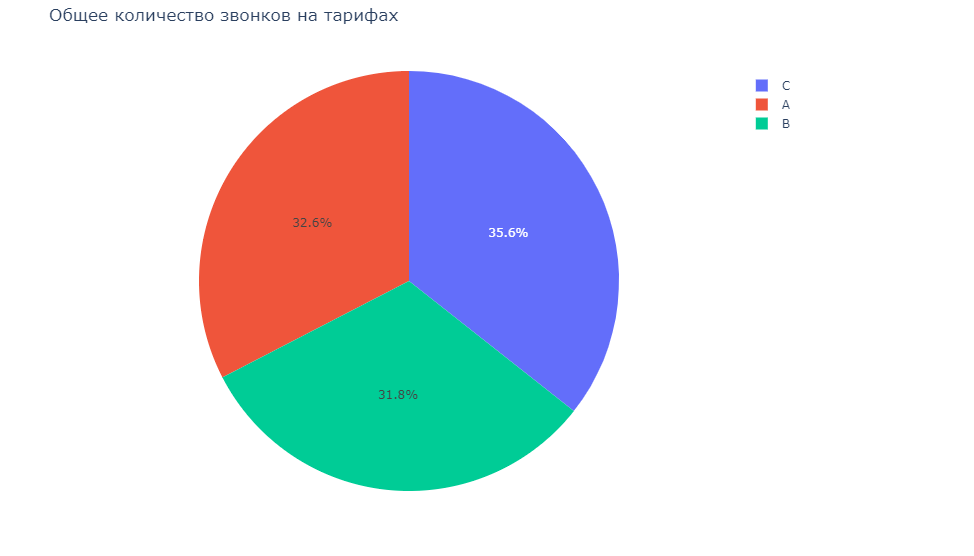

Общее количество звонков оказалось больше на тарифе С

Учтем, что в сутках 1440 минут. Согласно законодательству РФ при 8-ми часовом рабочем дней перерывы могут составлять от 30 мин до 2 часов. Тогда удалим еще 360 минут, у нас останется 1080 минут. Если учесть, что до 50% процентов времени занимает подготовка к звонку, набор намера и сохраниение результатотв звонка можно считать, что реальное время звонков должно составлять минимум 540 минут.


Оставим в датафрейме только тех операторов длительность разговора которых больше 540 минут. Так же удалим операторов, у которых были пропуски в id



    Цель нашего исследования сформировать критерии для определения Неэффективных операторов. Очевидно, что нас не интересуют операторы, которые в течении суток общаются по телефону более 540 минут. 
    Есть большая вероятность, что некоторые колл-центры не работают 24 часа сутки, так же есть вероятность, что часть сотрудников работают удаленно. В этом случае, у такого сотрудника может быть свой отдельный IP и, вряд ли, можно ожидать, что оператор будет работать по 24 часа. 
    Чтобы наши критерии были корректны, необходимо рассмотреть вариант работы оператора 8 часов в день. При этом варианте, мы конечно получим погрешность в выявлении Неэффективный операторов, которые работают 24 час, но, при этом, мы, с большой долей вероятности, сможем сказать, что оператор Неэффективен не зависимо от того раотает он 24 часа или 8.
    Для дальнейшего анализа примем следующие вводные: рабочий день 8 часов, в том числе обед и перерывы. 
    При этом мы не будем учитывать ситуацию, когда у сотрудника не лимитированный рабочий день и его работа оценивается по каким-то другим критериям.
    Если все это верно, мы можем сделать срез по времени разговора оператора на 208 минут (8 часов - 30 минут (обед) - 35 минут (5 минут каждый час) - 207 (50% времини на подготовку к звонку, набор номера, сохраниение результатов звонка). 
    Так же можем убрать тех операторов, которые делают более 20 исходящих состоявшихся звонков, которые были не по внутренней линии.
    
    Проверим нашу версию:
    

Для call центров работающих на разных тарифах проанализировать отличия на каждом тарифе.

1.1. Сделать группировку по call центрам и по тарифам. Вывести информацию сколько входящих и исходящих звонков в среднем в день call центрах на каждом тарифе.

1.2. Сколько пропущенных звонков. Какая средняя продолжительность. Какой процент от общего количества звонков составляют пропущенные.

1.3. Какое общее время звонков и ожидания (с учетом внутренних звонков). Определите в каких единицах указана продолжительность звонков и ожидания. Сколько звонков в день в может делать оператор? Какая их средняя продолжительность.

1.4. Определить основные отличия для каждого тарифах. Определить какие тарифы больше предназначены на исходящие звонки, а какие на входящие.

Посмотрим, сможем ли мы выделить узкую специализацию по тарифным планам на входящие или исходящие звонки.

Суммируем количество звонков и продолжительность звонков за каждый день у каждого оператора.

Общая:

In [47]:
telecom_dataset_clients_agg = telecom_dataset_clients.groupby(
    ['tariff_plan',
     'user_id',
     'direction',
     'internal',
     'is_missed_call',
     'operator_id',
     'date'
    ]).agg(
    {
        'calls_count': 'sum',
     'call_duration': 'sum',
    'total_call_duration': 'sum'
    }
).reset_index()


In [48]:
# уберем внутренние и исходящие звонки
telecom_dataset_clients_agg[
    (telecom_dataset_clients_agg['direction']=='in')&(telecom_dataset_clients_agg['internal']==False)
].groupby(['tariff_plan', 'is_missed_call']).mean()

user_id  internal    operator_id  \
tariff_plan is_missed_call                                           
A           False           167512.169710       0.0  917998.518257   
            True            167249.841195       0.0  185047.373428   
B           False           167171.203943       0.0  914301.269231   
            True            167193.631749       0.0   74331.575234   
C           False           167230.071777       0.0  908562.205811   
            True            167298.734116       0.0   50866.640470   

                            calls_count  call_duration  total_call_duration  
tariff_plan is_missed_call                                                   
A           False              4.192946     375.264315           431.804149  
            True               8.219340      13.639937           120.748428  
B           False              3.020039     322.357143           375.793148  
            True               6.635349       1.217063           110.275378  
C           False              3.718506     315.888916           365.060303  
            True               5.230051       0.368865            93.246311

In [49]:
# уберем внутренние и входящие звонки

telecom_dataset_clients_agg[
    (telecom_dataset_clients_agg['direction']=='out')&(telecom_dataset_clients_agg['internal']==False)
].groupby(['tariff_plan', 'is_missed_call']).mean()

user_id  internal    operator_id  \
tariff_plan is_missed_call                                           
A           False           167642.868726       0.0  922844.612796   
            True            167832.860686       0.0  915926.885120   
B           False           167121.772264       0.0  911367.937458   
            True            167007.725132       0.0  903455.915560   
C           False           167184.359818       0.0  912254.738555   
            True            167231.400969       0.0  902674.137361   

                            calls_count  call_duration  total_call_duration  
tariff_plan is_missed_call                                                   
A           False              5.690017     402.699945           489.349697  
            True              16.770970       0.000000           372.357768  
B           False              4.626785     416.551326           479.650918  
            True               8.561513       0.000000           190.239790  
C           False              6.235339     434.637911           518.862656  
            True              10.312910       0.000000           218.222286

Из сводных таблиц видим:

    Тариф "А" - самая большая средняя длительность входящих звонков 375 при самом большом среднем количестве входящих звонков. Этот тариф для входящей связи.
    
    Тариф "С" - самое большое среднее количество исходящих звонков 6.2, самая большая средняя продолжительность исходящих звонков 434.63 и довольно большое количество недозвонов 10.31. Это тариф для исходящей связи.
    
    Тариф "В" - занимает среднее положение, скорее  всего, его выбирают, когда нужны и входящие и исходящие звонки.
    


* 2. Для call центров работаюх на разных тарифных планах сформулировать метрики для оценки качества работы операторов.<a name="analysis_in_operator"></a>
     * 2.1. Проанализуйте работу операторов работающих в КЦ с тарифными планами для исходящих звонков. Определите среднее количество звонков в день, среднюю продолжительность. Исходя из общей прдолжительности звонков предположите единицы измерения. Из всей полученной информации сформулируйти критерии неэффективной работы оператора для таких КЦ. В Критериях должны быть отражены следующие данные: минимальная длительность звонков в день, минимальное количество звонков в день.
     * 2.2. Проанализируйте работу операторов работающих в КЦ с тарифными планами для входящих звонков. Определите среднюю продолжительность звонков в день, количество звонков в день, количество пропущенных звонков в день и их процент от общего количества звонков.Среднее время ожидания для недозвонов. Сформулируйте критерии для неэффективной работы операторов для таких КЦ. В критериях должны быть отражены сдедующие данные: продолжительность звонков в день, количечество пропущенных звонков (при хорошо отлаженной работе в КЦ допускается до 5% пропущенных звонков из общего числа звонков)

Изучим количество пропущенных звонков и время ожидания ответа на примере КЦ работающих на тарифе для входящих звонков "А"

In [50]:
# Делаем срез по времени звонков более 540 мин.
telecom_dataset_clients_agg = telecom_dataset_clients_agg[telecom_dataset_clients_agg['total_call_duration']<540]
# Оставляем только тариф А, входящие звонки, исключаем внутренние звонки, удаляем неизвестных операторов
user_id_in = telecom_dataset_clients_agg[
    (telecom_dataset_clients_agg['operator_id']!=-1)&
    (telecom_dataset_clients_agg['tariff_plan']=='A')&
    (telecom_dataset_clients_agg['direction']=='in')&
    (telecom_dataset_clients_agg['internal']==False)
]
user_id_in

,tariff_plan,user_id,direction,internal,is_missed_call,operator_id,date,calls_count,call_duration,total_call_duration
0,A,166407,in,False,False,888532.0,2019-09-10,2,223,242
2,A,166407,in,False,False,888532.0,2019-10-16,1,310,330
4,A,166407,in,False,False,888532.0,2019-10-21,2,147,187
5,A,166407,in,False,False,888532.0,2019-10-22,1,67,89
6,A,166407,in,False,False,888534.0,2019-09-11,1,59,72
...,...,...,...,...,...,...,...,...,...,...
9753,A,168295,in,False,False,960648.0,2019-11-21,6,151,332
9754,A,168295,in,False,False,960648.0,2019-11-22,1,23,41
9756,A,168295,in,False,False,960648.0,2019-11-28,3,207,248
9772,A,168295,in,False,True,960620.0,2019-11-28,1,0,14


In [ ]:
user_id_in = user_id_in[['user_id',
                         'operator_id',
                         'date', 'is_missed_call',
                         'calls_count', 'call_duration',
                         'total_call_duration']
                       ]
# Считаем столбец с данными о среднем времени ожиданиия
user_id_in['waiting_time'] = (user_id_in['total_call_duration'] - user_id_in['call_duration']) / user_id_in['calls_count']

In [52]:
# аггрегируем данные
operator_id_in = user_id_in.groupby(['operator_id', 'is_missed_call']).agg(
    {'date': 'count', 'calls_count': 'mean', 'call_duration': 'mean', 'waiting_time': 'mean'}
).reset_index()
operator_id_in

,operator_id,is_missed_call,date,calls_count,call_duration,waiting_time
0,884294.0,False,1,1.000000,5.000000,6.000000
1,885876.0,False,29,4.551724,185.206897,8.101244
2,885876.0,True,17,1.176471,0.294118,11.480392
3,885890.0,False,15,3.866667,218.600000,8.382778
4,885890.0,True,21,1.238095,0.238095,9.928571
...,...,...,...,...,...,...
238,961064.0,False,6,3.833333,120.000000,8.318254
239,964666.0,False,4,6.000000,222.000000,8.108333
240,964666.0,True,2,1.500000,144.000000,5.250000
241,968232.0,False,1,1.000000,114.000000,13.000000


Можем исключить операторов, которые проработали менее одной недели. Они уже доказали свою неэффективность.


In [53]:
# операторы, которые более 7 дней принимали хотя бы один звонок 
operator_id_in_1 = operator_id_in[
    (operator_id_in['date'] > 7)&
    (operator_id_in['is_missed_call'] == False)
][['operator_id', 'calls_count', 'call_duration', 'waiting_time']]
operator_id_in_1

,operator_id,calls_count,call_duration,waiting_time
1,885876.0,4.551724,185.206897,8.101244
3,885890.0,3.866667,218.600000,8.382778
7,888534.0,1.689655,101.827586,29.474138
11,889754.0,3.259259,218.703704,8.363815
13,891908.0,1.350000,119.900000,10.120833
...,...,...,...,...
209,941384.0,1.882353,117.941176,10.838235
219,948286.0,4.181818,136.090909,16.642607
221,948288.0,2.375000,125.875000,9.187500
227,951492.0,2.000000,278.545455,22.750000


In [54]:
# операторы у которых есть пропущенные звонки
operator_id_in_2 = operator_id_in[
    (operator_id_in['is_missed_call'] == True)
][['operator_id', 'calls_count', 'waiting_time']]

operator_id_in_2.rename(columns={'calls_count': 'missed_call', 'waiting_time': 'waiting_time_missed_call'}, inplace=True)

operator_id_in_2

,operator_id,missed_call,waiting_time_missed_call
2,885876.0,1.176471,11.480392
4,885890.0,1.238095,9.928571
6,888532.0,1.000000,53.000000
8,888534.0,1.000000,23.000000
12,889754.0,1.000000,8.500000
...,...,...,...
222,948288.0,1.000000,4.000000
230,951508.0,2.100000,20.928333
232,952948.0,1.142857,1.142857
236,960620.0,1.000000,14.000000


In [55]:
# Объеденим эти данные
operator_id_in_filter = pd.merge(operator_id_in_1, operator_id_in_2, on='operator_id', how='left').fillna(0)
operator_id_in_filter['prec_missed_call'] = operator_id_in_filter['missed_call'] / (operator_id_in_filter['calls_count'] + operator_id_in_filter['missed_call'])
operator_id_in_filter.sort_values(by='missed_call', ascending=False)

,operator_id,calls_count,call_duration,waiting_time,missed_call,waiting_time_missed_call,prec_missed_call
20,906412.0,1.461538,53.692308,14.269231,3.50,20.300000,0.705426
5,895574.0,1.594595,137.351351,15.027928,3.00,7.666667,0.652941
75,948286.0,4.181818,136.090909,16.642607,3.00,3.980000,0.417722
22,908960.0,3.882353,288.882353,24.135294,1.75,28.812500,0.310705
58,937958.0,2.529412,164.588235,17.075163,1.60,9.800000,0.387464
...,...,...,...,...,...,...,...
40,937708.0,2.750000,287.500000,14.229167,0.00,0.000000,0.000000
43,937742.0,1.500000,87.000000,16.916667,0.00,0.000000,0.000000
47,937782.0,1.533333,78.400000,11.994444,0.00,0.000000,0.000000
48,937788.0,3.882353,257.470588,9.628151,0.00,0.000000,0.000000


In [ ]:
x0 = operator_id_in_filter.waiting_time
x1 = operator_id_in_filter.waiting_time_missed_call


fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))


fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.55)
fig.show()

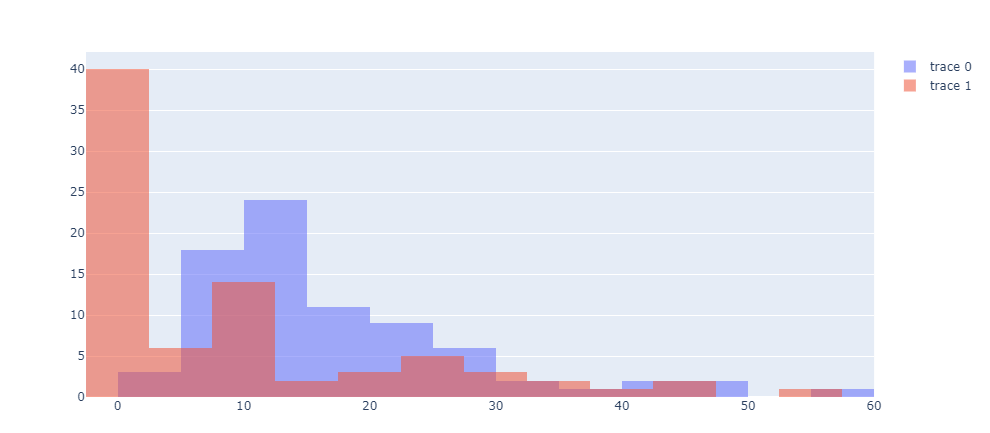

Отбросив самых нетерпеливых, можно констатировать, что до 10 мин чаще всего клиенты могут терпеливо ждать.

In [ ]:
x0 = operator_id_in_filter.prec_missed_call
fig = go.Figure()

fig.add_trace(go.Histogram(x=x0))
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.55)
fig.show()

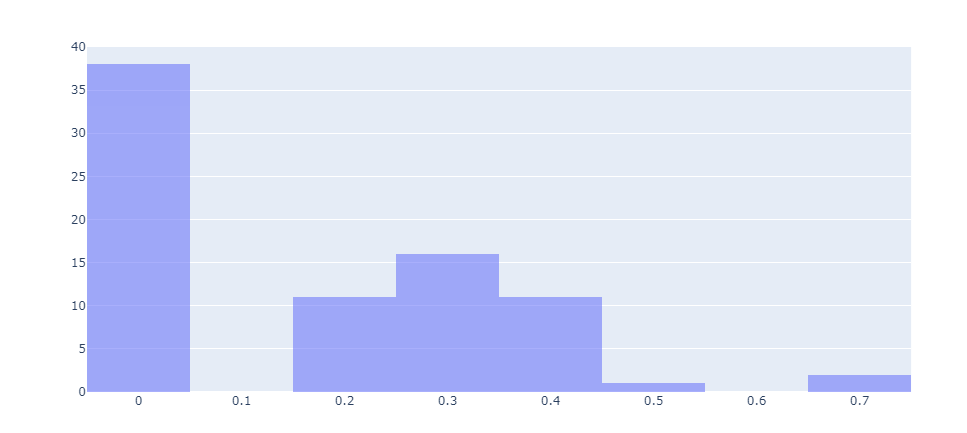

Из графики следует, что до 5% пропущенных звонков это нормальный показатель, в который укладываются многие операторы. Все, что больше это уже предмет для серьезного разговора.

Теперь на примере операторов на тарифе С изучим данные операторов, которые специализируются на исходящих звонках.

В этом случае нас будет интересовать количество исходящих звонков.

In [58]:
# Оставляем только тариф C, исходящие звонки, исключаем внутренние звонки, удаляем неизвестных операторов
user_id_out = telecom_dataset_clients_agg[
    (telecom_dataset_clients_agg['operator_id']!=-1)&
    (telecom_dataset_clients_agg['tariff_plan']=='C')&
    (telecom_dataset_clients_agg['direction']=='out')&
    (telecom_dataset_clients_agg['internal']==False)
]
user_id_out 

,tariff_plan,user_id,direction,internal,is_missed_call,operator_id,date,calls_count,call_duration,total_call_duration
24900,C,166487,out,False,False,959312.0,2019-11-12,1,6,19
24901,C,166487,out,False,False,959312.0,2019-11-18,2,286,317
24903,C,166487,out,False,False,959312.0,2019-11-20,6,320,402
24904,C,166487,out,False,False,959312.0,2019-11-21,6,335,411
24905,C,166487,out,False,False,959312.0,2019-11-22,13,424,493
...,...,...,...,...,...,...,...,...,...,...
40213,C,168601,out,False,True,952914.0,2019-11-27,2,0,14
40214,C,168601,out,False,True,952914.0,2019-11-28,2,0,67
40215,C,168601,out,False,True,952916.0,2019-11-12,1,0,44
40221,C,168606,out,False,False,957922.0,2019-11-08,2,255,328


In [59]:
user_id_out = user_id_out[
    [
        'user_id',
        'operator_id',
        'date',
        'is_missed_call',
        'calls_count',
        'call_duration',
        'total_call_duration'
    ]
]
user_id_out

,user_id,operator_id,date,is_missed_call,calls_count,call_duration,total_call_duration
24900,166487,959312.0,2019-11-12,False,1,6,19
24901,166487,959312.0,2019-11-18,False,2,286,317
24903,166487,959312.0,2019-11-20,False,6,320,402
24904,166487,959312.0,2019-11-21,False,6,335,411
24905,166487,959312.0,2019-11-22,False,13,424,493
...,...,...,...,...,...,...,...
40213,168601,952914.0,2019-11-27,True,2,0,14
40214,168601,952914.0,2019-11-28,True,2,0,67
40215,168601,952916.0,2019-11-12,True,1,0,44
40221,168606,957922.0,2019-11-08,False,2,255,328


In [60]:
# аггрегируем данные
user_id_out = user_id_out.groupby(['operator_id', 'is_missed_call']).agg(
    {
        'date': 'count',
        'calls_count': 'mean',
        'call_duration': 'mean',
        'total_call_duration': 'mean'
    }
).reset_index()
user_id_out

,operator_id,is_missed_call,date,calls_count,call_duration,total_call_duration
0,883018.0,True,1,2.000000,0.0,15.000000
1,883898.0,False,1,1.000000,70.0,80.000000
2,884946.0,False,15,3.266667,118.4,171.666667
3,884946.0,True,17,5.411765,0.0,150.058824
4,885682.0,True,3,1.000000,0.0,17.000000
...,...,...,...,...,...,...
428,969386.0,True,3,7.333333,0.0,121.666667
429,972460.0,False,1,3.000000,109.0,177.000000
430,972460.0,True,2,13.000000,0.0,173.000000
431,973120.0,False,1,1.000000,5.0,24.000000


In [61]:
# операторы, которые более 7 дней совершали хотя бы один звонок 
user_id_out_1 = user_id_out[
    (user_id_out['date'] > 7)&
    (user_id_out['is_missed_call'] == False)
][
    [
        'operator_id',
        'calls_count',
        'call_duration',
        'total_call_duration'
    ]
]
user_id_out_1

,operator_id,calls_count,call_duration,total_call_duration
2,884946.0,3.266667,118.400000,171.666667
7,889410.0,5.638298,230.085106,311.340426
10,890228.0,1.611111,117.444444,140.888889
14,890582.0,1.909091,92.363636,112.636364
16,890618.0,3.000000,182.727273,234.090909
...,...,...,...,...
296,935216.0,1.500000,187.375000,198.375000
316,939738.0,3.111111,269.000000,312.777778
332,944644.0,3.900000,218.400000,268.200000
346,948182.0,4.000000,243.625000,302.625000


In [ ]:
x0 = user_id_out_1.calls_count


fig = go.Figure()

fig.add_trace(go.Histogram(x=x0))

fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.55)
fig.show()

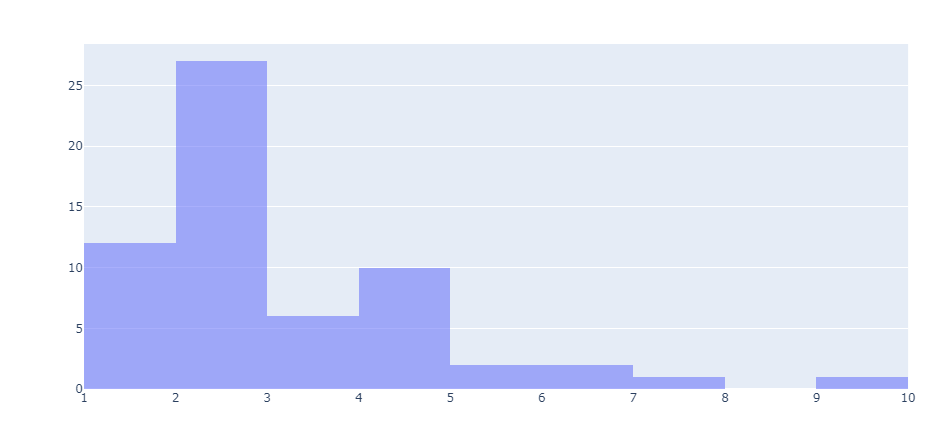

In [ ]:
x0 = user_id_out_1.total_call_duration
x1 = user_id_out_1.call_duration

fig = go.Figure()

fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.55)
fig.show()

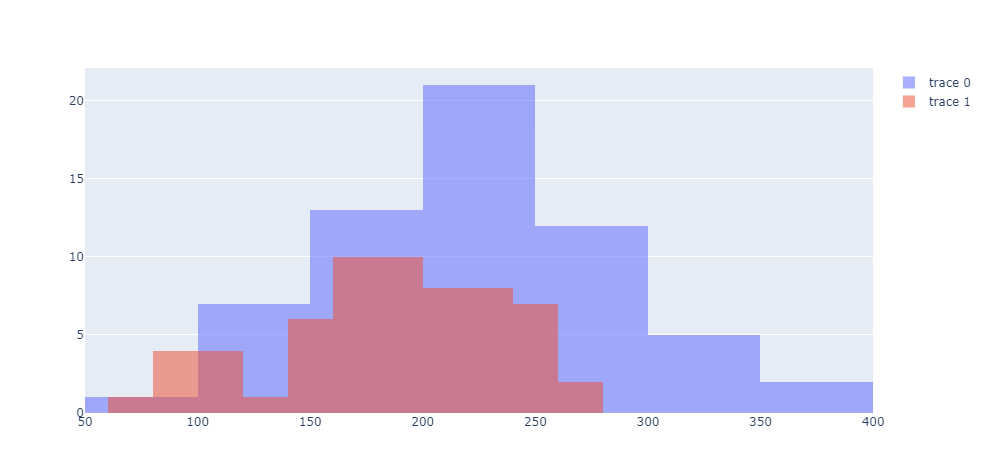

In [64]:
# соберем информацию по количеству недозвонов
user_id_out_2 = user_id_out[user_id_out['is_missed_call'] == True][['operator_id','calls_count']]
user_id_out_2

,operator_id,calls_count
0,883018.0,2.000000
3,884946.0,5.411765
4,885682.0,1.000000
6,888406.0,1.000000
8,889410.0,3.315789
...,...,...
424,969288.0,2.000000
426,969294.0,2.500000
428,969386.0,7.333333
430,972460.0,13.000000


In [65]:
# Объеденим эти данные
operator_id_out_filter = pd.merge(user_id_out_1, user_id_out_2, on='operator_id', how='left').fillna(0)
operator_id_out_filter['calls_count_total'] = operator_id_out_filter['calls_count_x'] + operator_id_out_filter['calls_count_y']
operator_id_out_filter.sort_values(by='calls_count_total', ascending=False)


,operator_id,calls_count_x,call_duration,total_call_duration,calls_count_y,calls_count_total
50,921818.0,9.600000,238.600000,384.000000,9.525424,19.125424
9,893674.0,4.750000,154.125000,233.375000,12.571429,17.321429
13,899082.0,7.411765,212.294118,322.470588,6.927536,14.339301
15,900180.0,2.625000,189.375000,216.750000,11.625000,14.250000
10,893804.0,2.777778,147.500000,188.500000,11.135593,13.913371
...,...,...,...,...,...,...
56,935216.0,1.500000,187.375000,198.375000,2.000000,3.500000
11,897872.0,1.428571,177.214286,187.785714,2.000000,3.428571
53,924546.0,2.357143,172.571429,191.214286,1.000000,3.357143
7,893402.0,1.304348,85.260870,101.260870,1.750000,3.054348


In [ ]:
x0 = operator_id_out_filter.calls_count_x
x1 = operator_id_out_filter.calls_count_total

fig = go.Figure()

fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.55)
fig.show()

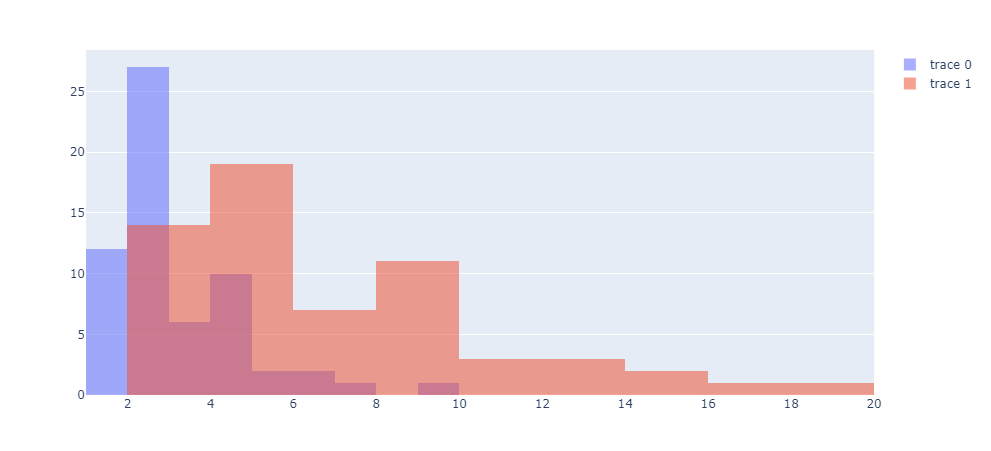

Можно говорить о том, что у оператор должен совершать минимум 5 дозвонов в день средней продолжительностью не менее 208 минут

Проверим наши критерии

Для исходящих звонков:
    5 звонков (состоявшихся) в день средней продолжительностью более 208 минут
Для входящих звонков:
    ожидание клиента не более 10 минут
    количество пропущенных звонков не более 5%


In [67]:
test = telecom_dataset_clients_agg.groupby(
    [
        'tariff_plan',
        'user_id', 'direction',
        'is_missed_call',
        'operator_id'
    ]
).agg(
    {
        'date': 'count',
        'calls_count': 'mean',
        'call_duration': 'mean',
        'total_call_duration': 'mean'
    }
).reset_index()
test['waiting_time'] = (test['total_call_duration'] - test['call_duration']) / test['calls_count']
test.head()

,tariff_plan,user_id,direction,is_missed_call,operator_id,date,calls_count,call_duration,total_call_duration,waiting_time
0,A,166407,in,False,888532.0,5,1.400,150.000000,174.000,17.142857
1,A,166407,in,False,888534.0,32,1.625,96.218750,143.125,28.865385
2,A,166407,in,False,888536.0,2,1.000,149.500000,171.000,21.500000
3,A,166407,in,False,888540.0,3,1.000,290.333333,310.000,19.666667
4,A,166407,in,False,907440.0,5,1.000,105.400000,126.400,21.000000


In [68]:
# данные по исходящим звонкам для операторов
test_out = test[(test['direction']== 'out')&(test['is_missed_call']== False)][
    ['tariff_plan',
    'operator_id',
    'calls_count',
    'total_call_duration']
]

In [69]:
# данные по входящим звонкам для операторов принятые звонки
test_in = test[(test['direction']== 'in')&(test['is_missed_call']== False)][
    ['operator_id',
    'calls_count',
    'total_call_duration',
    'waiting_time']
]
test_in.rename(columns={'calls_count': 'received_calls'}, inplace=True)
test_in.head()


,operator_id,received_calls,total_call_duration,waiting_time
0,888532.0,1.400,174.000,17.142857
1,888534.0,1.625,143.125,28.865385
2,888536.0,1.000,171.000,21.500000
3,888540.0,1.000,310.000,19.666667
4,907440.0,1.000,126.400,21.000000


In [70]:
# данные по входящим звонкам для операторов не принятые звонки
test_in_is_missed_call = test[(test['direction']== 'in')&(test['is_missed_call']== True)][
    ['operator_id',
    'calls_count']
]
test_in_is_missed_call.rename(columns={'calls_count': 'received_not_calls'}, inplace=True)
test_in_is_missed_call.head()

,operator_id,received_not_calls
5,-1.0,1.833333
6,888532.0,1.000000
7,888534.0,1.000000
26,-1.0,6.333333
31,-1.0,3.893333


In [71]:
# объеденим даные и сформируем столбец с процентом пропущенных звонков
test_in_final = pd.merge(test_in, test_in_is_missed_call, on='operator_id', how='left').fillna(0)
test_in_final['prec_received_not_calls'] = test_in_final['received_not_calls'] /(test_in_final['received_calls']+test_in_final['received_not_calls'])
test_in_final = test_in_final[['operator_id', 'waiting_time', 'prec_received_not_calls']]
test_in_final.head()

,operator_id,waiting_time,prec_received_not_calls
0,888532.0,17.142857,0.416667
1,888534.0,28.865385,0.380952
2,888536.0,21.500000,0.000000
3,888540.0,19.666667,0.000000
4,907440.0,21.000000,0.000000


In [72]:
# общая сводная таблица для проверки
test_end = pd.merge(test_out, test_in_final, on='operator_id', how='left').fillna(0)
test_end.head()

,tariff_plan,operator_id,calls_count,total_call_duration,waiting_time,prec_received_not_calls
0,A,888532.0,2.673913,120.065217,17.142857,0.416667
1,A,888534.0,1.985075,112.507463,28.865385,0.380952
2,A,888536.0,1.809524,60.476190,21.500000,0.000000
3,A,888538.0,1.000000,137.333333,0.000000,0.000000
4,A,888540.0,1.142857,79.571429,19.666667,0.000000


Выведем данные по неэффективным операторам

In [73]:
result = test_end[(test_end['calls_count'] < 5)&
         (test_end['waiting_time']>10)&
         (test_end['prec_received_not_calls'] > 0.05)&
         (test_end['total_call_duration'] < 208)
        ]
result.head()

,tariff_plan,operator_id,calls_count,total_call_duration,waiting_time,prec_received_not_calls
0,A,888532.0,2.673913,120.065217,17.142857,0.416667
1,A,888534.0,1.985075,112.507463,28.865385,0.380952
8,A,908958.0,1.555556,119.888889,20.525000,0.310345
9,A,908960.0,1.807692,123.115385,21.783505,0.413011
24,A,906392.0,1.000000,70.800000,13.000000,0.614035


Для тарифа А

In [74]:
a = len(result[result['tariff_plan']== 'A']) 
        
print(f'Количество неэффективных операторов на тарифе А {a}')         

Количество неэффективных операторов на тарифе А 2451


Для тарифа В

In [75]:
b = len(result[result['tariff_plan']== 'B']) 
        
print(f'Количество неэффективных операторов на тарифе B {b}')  

Количество неэффективных операторов на тарифе B 29


Для тарифа С

In [76]:
c = len(result[result['tariff_plan']== 'C']) 
        
print(f'Количество неэффективных операторов на тарифе C {c}') 

Количество неэффективных операторов на тарифе C 22


In [77]:
test2 = test[test['is_missed_call']==False][
    ['tariff_plan',
     'operator_id', 'direction',
     'calls_count', 'call_duration',
     'waiting_time']
]

***Вывод***


    Тариф "А" - самая большая средняя длительность входящих звонков 375 при самом большом среднем количестве входящих звонков. Этот тариф для входящей связи.
    
    Тариф "С" - самое большое среднее количество исходящих звонков 6.2, самая большая средняя продолжительность исходящих звонков 434.63 и довольно большое количество недозвонов 10.31. Это тариф для исходящей связи.
    
    Тариф "В" - занимает среднее положение, скорее  всего, его выбирают, когда нужны и входящие и исходящие звонки.
    
После анализа данных приняли следующие критерии неэффективности операторов:

Для исходящих звонков:
    5 звонков (состоявшихся) в день средней продолжительностью более 208 минут
Для входящих звонков:
    ожидание клиента не более 10 минут
    количество пропущенных звонков не более 5%


Проверка критерияв на тарифах дала следующий результат:

     Количество неэффективных операторов на тарифе А 2451
     Количество неэффективных операторов на тарифе B 29
     Количество неэффективных операторов на тарифе C 22


[Вернуться в начало](#start)

***Часть 4. Статистический анализ***     
* [1. На основе полученных данных формулируем две нулевые гипотезы.](#analysis_stat)
     * 1.1. Call центры работающие тарифном плане А совершают больше контактов с клиентами, чем центры которые работают на Тарифных планах В и С. 
     * 1.2. Длительность разговоров в Call центрах работающих тарифном плане А больше, чем центрах которые работают на тарифных планах В и С.
     * 1.3. Определяем значение уровня значимаости (`alpha`).
     * 1.4. Проверяем нулевые гипотезы. Выводим результаты проверки.    

**Проверка гипотезы**
```
H_0: Количество звонков (calls_count) операторов на тарифе А = Количество звонков (calls_count) операторов на тарифе В
H_a: Количество звонков (calls_count) операторов на тарифе А ≠ Количество звонков (calls_count) операторов на тарифе В
alpha = 0.05
```

In [78]:
sample_1 = telecom_dataset_clients_agg.query('tariff_plan=="A"')['calls_count']
sample_2 = telecom_dataset_clients_agg.query('tariff_plan=="B"')['calls_count']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 


print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.35213865547192036
Не получилось отвергнуть нулевую гипотезу


**Проверка гипотезы**
```
H_0: Количество звонков (calls_count) операторов на тарифе А = Количество звонков (calls_count) операторов на тарифе C
H_a: Количество звонков (calls_count) операторов на тарифе А ≠ Количество звонков (calls_count) операторов на тарифе C
alpha = 0.05
```

In [79]:
sample_3 = telecom_dataset_clients_agg.query('tariff_plan=="C"')['calls_count']

results = st.ttest_ind(sample_1, sample_3, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 


print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.18342453702805644
Не получилось отвергнуть нулевую гипотезу


**Проверка гипотезы**
```
H_0: Длительность разговоров в Call центрах на тарифе А = Длительность разговоров в Call центрах на тарифе В
H_a: Длительность разговоров в Call центрах на тарифе А ≠ Длительность разговоров в Call центрах на тарифе В
alpha = 0.05
```

In [80]:
sample_4 = telecom_dataset_clients_agg.query('tariff_plan=="A"')['call_duration']
sample_5 = telecom_dataset_clients_agg.query('tariff_plan=="B"')['call_duration']

results = st.ttest_ind(sample_4, sample_5, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 


print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4713487756341452e-06
Отвергаем нулевую гипотезу


**Проверка гипотезы**
```
H_0: Длительность разговоров в Call центрах на тарифе А = Длительность разговоров в Call центрах на тарифе С
H_a: Длительность разговоров в Call центрах на тарифе А ≠ Длительность разговоров в Call центрах на тарифе С
alpha = 0.05
```

In [81]:
sample_6 = telecom_dataset_clients_agg.query('tariff_plan=="C"')['call_duration']

results = st.ttest_ind(sample_4, sample_6, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 


print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

5.928243376015331e-10
Отвергаем нулевую гипотезу


[Вернуться в начало](#start)

***Часть 5. Выводы. Рекомендации для заказчика***     
* [1. На основе проведенного аналаза формулируем выводы.](#conclusion)  <a name="analysis_in_centr"></a>
     * 1.1. Критерии неэффективности операторов


****Вывод****

**Знакомство с данными**

Для анализа у нас два датафрейма с данными

В первой таблице `telecom_clients` информацию о тарифах, на которых работают операторы. 

Всего имеем три тарифа:А, В и С. 

Первая регистрация 01.08.2019, последняя 31.10.2022 года

Во второй таблице `telecom_dataset` 53902 строки, 9 столбцов.

Всего имеем информацию по 1092 операторам в 307 Call центрах.

    Дата первого наблюдения 2019-08-02
    Дата последнего наблюдения 2019-11-28
    
В столбце `date` необходими изменить тип и формат.

**Предобработка данных**

В telecom_dataset выявили  в internal и 8172 пропуска в operator_id

    В operator_id 8172 пропусков заменили  на "не определено"
    В internal 117 пропусков заменили на 0
В telecom_dataset 4900 полных дубликата были удалены.

Изменили формат даты для удобства отображения и обработки.

Определили, что длительность звонков измеряется в минутах. 

Удалили выбросы по длительности звонков в день и сделали срез до 1440 мин (1 сутки)

Удалили выбросы по количеству звонков в день и сделали срез до 200 звонков.

Объединили обе таблицы для дальнейшего анализа в срезе тарифных планов.


**Анализ данных**

    Тариф "А" - самая большая средняя длительность входящих звонков 375 при самом большом среднем количестве входящих звонков. Этот тариф для входящей связи.
    
    Тариф "С" - самое большое среднее количество исходящих звонков 6.2, самая большая средняя продолжительность исходящих звонков 434.63 и довольно большое количество недозвонов 10.31. Это тариф для исходящей связи.
    
    Тариф "В" - занимает среднее положение, скорее  всего, его выбирают, когда нужны и входящие и исходящие звонки.
    
После анализа данных приняли следующие критерии неэффективности операторов:

Для исходящих звонков:
    5 звонков (состоявшихся) в день средней продолжительностью более 208 минут
Для входящих звонков:
    ожидание клиента не более 10 минут
    количество пропущенных звонков не более 5%


Проверка критерияв на тарифах дала следующий результат:

     Количество неэффективных операторов на тарифе А 2451
     Количество неэффективных операторов на тарифе B 29
     Количество неэффективных операторов на тарифе C 22

****Для входящих звонков:****

***ожидание клиента не более 10 минут***


***количество пропущенных звонков не более 5%***


****Для исходящих звонков:****

***5 звонков (состоявшихся) в день средней продолжительностью более 208 минут***



Результаты проверки гипотез:

    Количество звонков (calls_count) операторов на тарифе А ≠ Количество звонков (calls_count) операторов на тарифе В
    Количество звонков (calls_count) операторов на тарифе А ≠ Количество звонков (calls_count) операторов на тарифе C
    Длительность разговоров в Call центрах на тарифе А = Длительность разговоров в Call центрах на тарифе С
    Длительность разговоров в Call центрах на тарифе А ≠ Длительность разговоров в Call центрах на тарифе С
    

*** Дополнительные выводы и рекомендации**

В целом концепт предложения по определению неэффективных операторов имеет смысл.

На всех тарифах были выявлены неэффективные операторы, причем на тирифе А - значительное количество.
На тарифах В и С неэффективных операторов не много, но нужно учитывать, что исходные данные не позволяют более точно сформулировать критерии. 

Думаю, можно сделать более точный анализ с учетом всех нюансов, если в исходных данных будет дополнительная информация по специфике работы КЦ, опыте операторов (стажеры работают хуже, но и вряд ли их можно оценивать на равных), каких-то дополнительных особенностях каждого направления, более подробное описание опций каждого тарифа и т.д. и т.п.

[Вернуться в начало](#start)

# Дашборды

Чтобы отправить дашборд, приложите к проекту ссылку на файл. Выберите один из наборов:

Набор №2

1. Постройте диаграмму количества вызовов по дням;
2. Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов;
3. Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

<code>[Дашборд: Телеком. Определение неэффективных операторов.](https://public.tableau.com/views/Telecom_16687102882010/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)
</code>